RDU/TDF columns
1. station - station name
2. date - date of observation (timezone GMT)
3. time - time of observation (timezone GMT)
4. wbgt - wet bulb globe temperature (°F)
5. ta - air temperature (°F)
6. rh - relative humidity (%)
7. td - dewpoint temperature (°F)
8. speed2m - wind speed 2 meters above ground (mph)
9. solar - solar radiation (w/m2)
10. cloudcover - percentage cloud cover
11. hi - heat index (°F)
12. lat - latitude of station
13. lon - longitude of station

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
rdu = pd.read_csv("weather_station_data_20220915/rdu_station_data.csv")

In [3]:
rdu

,station,date,time,wbgt,ta,rh,td,speed2m,solar,cloudcover,hi,lat,lon
0,RDU,1/1/2014,0:51,33.3,37.9,57,24.1,4.5,0,87,36.0,35.8922,-78.7819
1,RDU,1/1/2014,1:51,31.9,36.0,67,26.1,2.2,0,87,34.2,35.8922,-78.7819
2,RDU,1/1/2014,2:51,31.6,36.0,64,25.0,2.2,0,87,34.2,35.8922,-78.7819
3,RDU,1/1/2014,3:51,30.2,34.0,69,25.0,2.2,0,87,32.2,35.8922,-78.7819
4,RDU,1/1/2014,4:51,29.5,33.1,72,25.0,2.2,0,87,31.3,35.8922,-78.7819
...,...,...,...,...,...,...,...,...,...,...,...,...,...
85340,RDU,9/12/2022,22:51,75.5,80.1,71,70.0,2.7,43,87,83.3,35.8922,-78.7819
85341,RDU,9/12/2022,23:09,74.8,80.1,71,70.0,3.6,9,87,83.3,35.8922,-78.7819
85342,RDU,9/12/2022,23:16,74.2,79.0,74,70.0,5.4,0,87,81.7,35.8922,-78.7819
85343,RDU,9/12/2022,23:28,74.5,75.9,94,73.9,2.2,0,87,77.6,35.8922,-78.7819


In [4]:
rdu["date_time"] = rdu["date"] + " " + rdu["time"]

In [5]:
rdu['date_time'] = pd.to_datetime(rdu['date_time'])

In [6]:
rdu_sub = rdu[['date_time', 'wbgt','ta','rh','td','speed2m','solar','cloudcover','hi']]

In [7]:
EH_Conditions = [
    (rdu_sub['hi'] < 80),
    (rdu_sub['hi'] >= 80) & (rdu_sub['hi'] < 90),
    (rdu_sub['hi'] >= 90) & (rdu_sub['hi'] < 103),
    (rdu_sub['hi'] >= 103) & (rdu_sub['hi'] < 124),
    (rdu_sub['hi'] >= 124)
]

EH_Categories = ['None','Caution', 'Extreme Caution', 'Danger', 'Extreme Danger']

rdu_sub['EH'] = np.select(EH_Conditions, EH_Categories)

/var/folders/cl/s7gjgzxs6rv0zvrqnr00vk800000gn/T/ipykernel_33087/2264300285.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rdu_sub['EH'] = np.select(EH_Conditions, EH_Categories)


In [8]:
rdu_dummies = pd.get_dummies(rdu_sub)

In [9]:
corr = rdu_dummies.corr()

In [10]:
corr

,wbgt,ta,rh,td,speed2m,solar,cloudcover,hi,EH_Caution,EH_Danger,EH_Extreme Caution,EH_None
wbgt,1.000000,0.982715,0.068339,0.905570,0.168340,0.416459,0.164236,0.984343,0.390815,0.105507,0.356806,-0.559556
ta,0.982715,1.000000,-0.047078,0.862078,0.193592,0.394749,0.142430,0.996092,0.411453,0.115316,0.380581,-0.592784
rh,0.068339,-0.047078,1.000000,0.457823,-0.205017,-0.499871,0.324925,-0.008276,-0.150134,-0.053847,-0.177165,0.241443
td,0.905570,0.862078,0.457823,1.000000,0.067250,0.092037,0.287322,0.879651,0.297303,0.074988,0.252530,-0.413345
speed2m,0.168340,0.193592,-0.205017,0.067250,1.000000,0.272643,0.168629,0.183535,0.072473,0.042932,0.080312,-0.116127
solar,0.416459,0.394749,-0.499871,0.092037,0.272643,1.000000,-0.201228,0.385381,0.269987,0.113052,0.346573,-0.453789
cloudcover,0.164236,0.142430,0.324925,0.287322,0.168629,-0.201228,1.000000,0.152429,0.006637,0.000267,-0.003336,-0.003554
hi,0.984343,0.996092,-0.008276,0.879651,0.183535,0.385381,0.152429,1.000000,0.415122,0.137965,0.417867,-0.622133
EH_Caution,0.390815,0.411453,-0.150134,0.297303,0.072473,0.269987,0.006637,0.415122,1.000000,-0.020468,-0.080804,-0.781700
EH_Danger,0.105507,0.115316,-0.053847,0.074988,0.042932,0.113052,0.000267,0.137965,-0.020468,1.000000,-0.014066,-0.136076


In [11]:
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(250, 30, as_cmap=True)

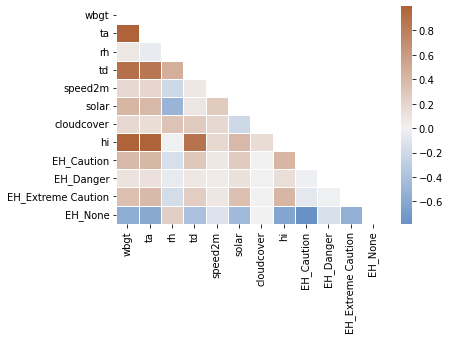

In [12]:
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,linewidths=.5)
plt.show()

In [13]:
# Never have extreme danger in RDU data
rdu_sub['EH'].value_counts()

None               71573
Caution             8979
Extreme Caution     4490
Danger               303
Name: EH, dtype: int64

In [14]:
#rdu_sub.groupby(['EH'])['speed2m'].median()
#rdu_sub.groupby(['EH'])['wbgt'].median()
rdu_sub.groupby(['EH'])['solar'].median()

EH
Caution            309.0
Danger             485.0
Extreme Caution    450.0
None                 0.0
Name: solar, dtype: float64

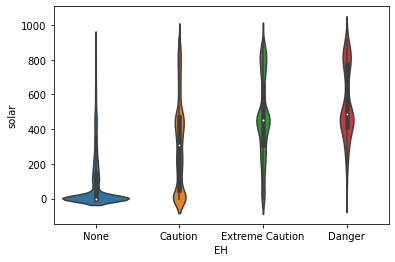

In [15]:
sns.violinplot(data=rdu_sub, x="EH", y="solar")
plt.show()

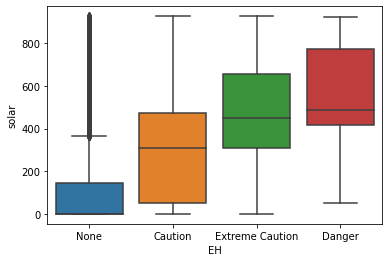

In [16]:
sns.boxplot(data=rdu_sub, x="EH", y="solar")
plt.show()

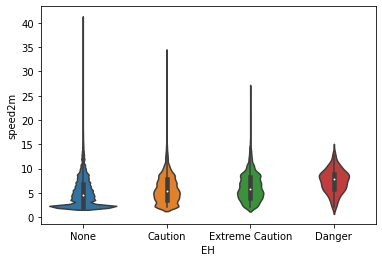

In [17]:
sns.violinplot(data=rdu_sub, x="EH", y="speed2m")
plt.show()

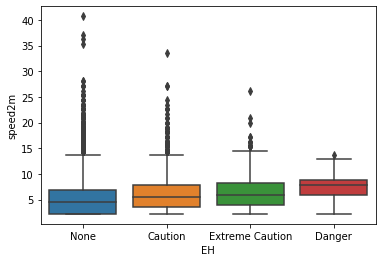

In [18]:
sns.boxplot(data=rdu_sub, x="EH", y="speed2m")
plt.show()

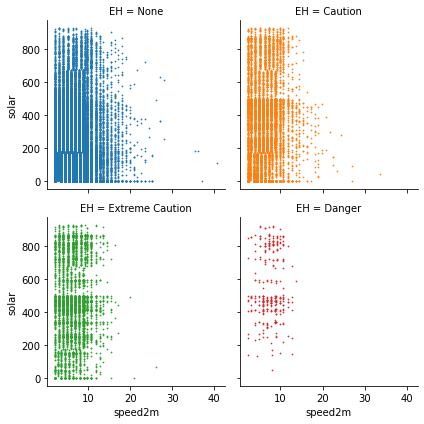

In [19]:
solar_wind = sns.FacetGrid(rdu_sub, col="EH", hue="EH", col_wrap=2)
solar_wind.map(plt.scatter, "speed2m", "solar", s = .5)
plt.show()

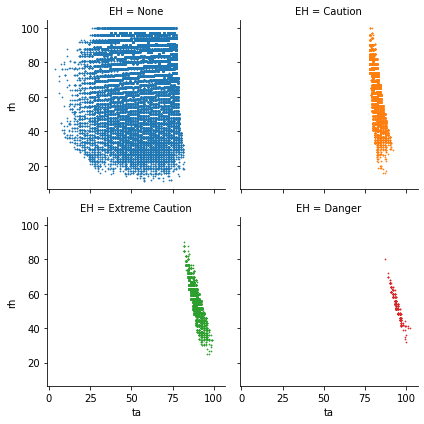

In [20]:
ta_rh = sns.FacetGrid(rdu_sub, col="EH", hue="EH", col_wrap=2)
ta_rh.map(plt.scatter, "ta", "rh", s = .5)
plt.show()

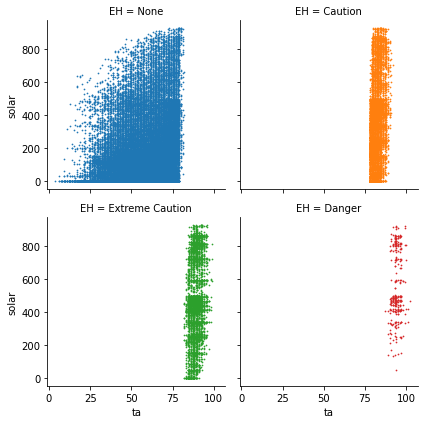

In [21]:
ta_solar = sns.FacetGrid(rdu_sub, col="EH", hue="EH", col_wrap=2)
ta_solar.map(plt.scatter, "ta", "solar", s = .5)
plt.show()

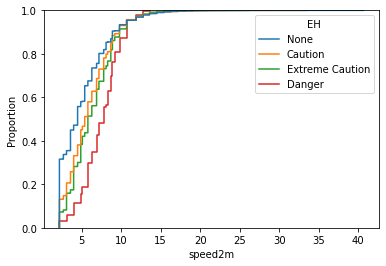

In [22]:
sns.ecdfplot(data=rdu_sub, x= "speed2m", hue="EH")
plt.show()

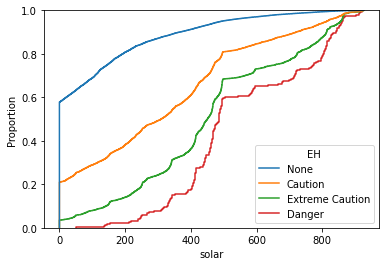

In [23]:
sns.ecdfplot(data=rdu_sub, x= "solar", hue="EH")
plt.show()

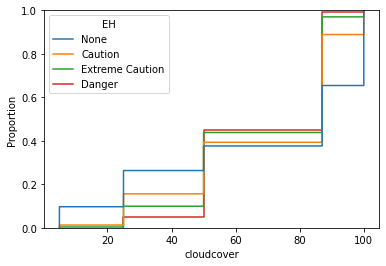

In [24]:
sns.ecdfplot(data=rdu_sub, x= "cloudcover", hue="EH")
plt.show()

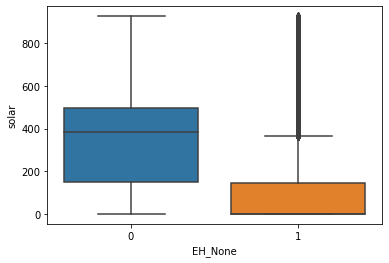

In [26]:
sns.boxplot(data=rdu_dummies, x="EH_None", y="solar")
plt.show()

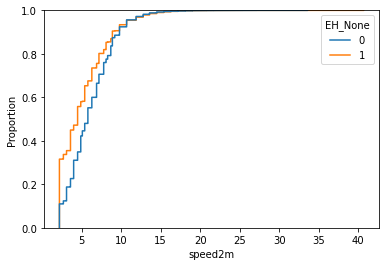

In [27]:
sns.ecdfplot(data=rdu_dummies, x= "speed2m", hue="EH_None")
plt.show()

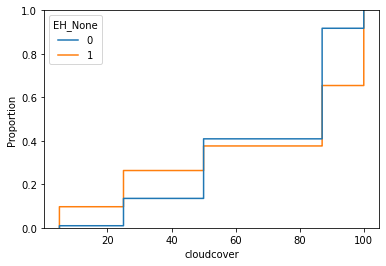

In [29]:
sns.ecdfplot(data=rdu_dummies, x= "cloudcover", hue="EH_None")
plt.show()

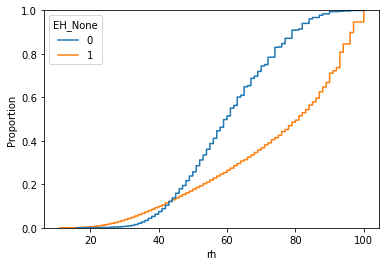

In [30]:
sns.ecdfplot(data=rdu_dummies, x= "rh", hue="EH_None")
plt.show()